In [ ]:
import numpy as np
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/8q/5bw1ycfx0qn18y24vc75w37c0000gp/T/ipykernel_28713/415757399.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Activity Date'] = pd.to_datetime(df['Activity Date'])


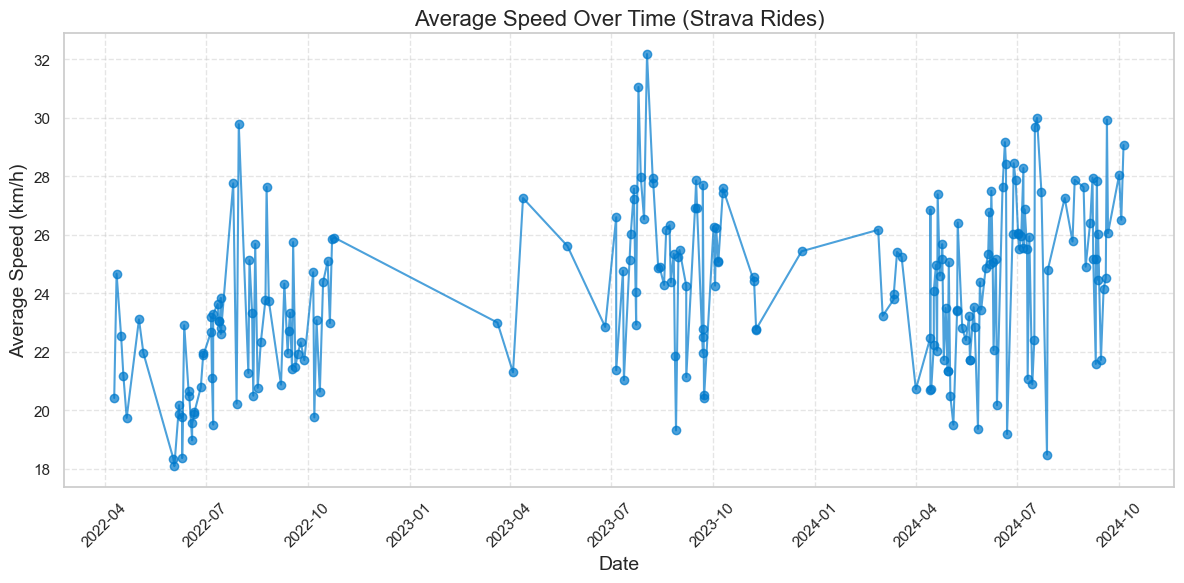

In [9]:


# Read activities from CSV file
csv_file_path = './strava-latest/activities.csv'  # Update with your CSV file path

# Load CSV data into a DataFrame
df = pd.read_csv(csv_file_path)

# Filter only 'Ride' activities and select relevant columns
df = df[df['Activity Type'] == 'Ride'][['Activity Date', 'Average Speed']]


# Remove rows where average speed is 0
df = df[df['Average Speed'] > 5]

# Convert average speed from m/s to km/h
df['Average Speed'] = df['Average Speed'] * 3.6

# Sort by date
df['Activity Date'] = pd.to_datetime(df['Activity Date'])
df = df.sort_values(by='Activity Date')

# Set Seaborn style for a cleaner look
sns.set(style='whitegrid')

# Plot the average speed over time
plt.figure(figsize=(12, 6))
plt.plot(df['Activity Date'], df['Average Speed'], marker='o', linestyle='-', color='#007acc', alpha=0.7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Speed (km/h)', fontsize=14)
plt.title('Average Speed Over Time (Strava Rides)', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Perform linear regression to analyze trend over time
numeric_dates = (df['Activity Date'] - df['Activity Date'].min()).dt.days
slope, intercept, r_value, p_value, std_err = linregress(numeric_dates, df['Average Speed'])

# Plot regression line
regression_line = intercept + slope * numeric_dates
plt.plot(df['Activity Date'], regression_line, color='r', linestyle='--', linewidth=2, label='Trend Line')
plt.legend()
plt.show()

# Print analysis result
if slope > 0:
    print(f"Average speed has increased over time with a slope of {slope:.2f} km/h per day.")
elif slope < 0:
    print(f"Average speed has decreased over time with a slope of {slope:.2f} km/h per day.")
else:
    print("Average speed has remained consistent over time.")